### 12. Creating and applying your own filter

- 선형 필터를 자체적으로 생성하고 이미지에 적용하는 방법

1. 필요한 모듈을 가져오고 이미지를 읽는다

In [1]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../data/Lena.png')

2. 11 * 11 크기의 선명화 커널을 생성한다

In [4]:
KSIZE = 11
ALPHA = 2

kernel = cv2.getGaussianKernel(KSIZE, 0)
kernel = -ALPHA * kernel @ kernel.T
kernel[KSIZE//2, KSIZE//2] += 1 + ALPHA
print(kernel.shape, kernel.dtype, kernel.sum())

(11, 11) float64 0.9999999999999992


3. 앞에서 생성한 커널을 사용해 이미지를 필터링한다

In [6]:
filtered = cv2.filter2D(img, -1, kernel)

4. 결과를 시각화한다

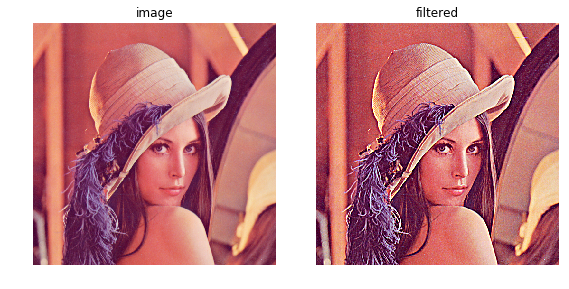

In [9]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.axis('off')
plt.title('image')
plt.imshow(img[ : , : , [2,1,0]])
plt.subplot(122)
plt.axis('off')
plt.title('filtered')
plt.imshow(filtered[ : , : , [2,1,0]])
plt.tight_layout(True)
plt.show()

- OpenCV의 cv2.filter2d 함수는 매개변수로 입력 이미지, 출력 결과 데이터 타입, OpenCV ID (입력 이미지 데이터 유형을 유지하려는 경우 -1), 필터 커널을 받는다
- 이 함수는 이미지를 선형적으로 필터링한다
- 여기선 원본 이미지에서 높은 빈도를 강조하기 위해 높은 주파수를 강조하는 선명화 커널을 구성했다


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


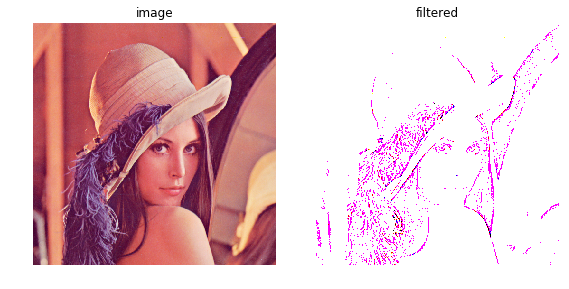

In [16]:
filtered = cv2.filter2D(img, 1, kernel)
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.axis('off')
plt.title('image')
plt.imshow(img[ : , : , [2,1,0]])
plt.subplot(122)
plt.axis('off')
plt.title('filtered')
plt.imshow(filtered[ : , : , [2,1,0]])
plt.tight_layout(True)
plt.show()